In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulate_ctmc import simulate_ctmc, divide_into_frames

In [7]:
np.load("/home/lenoco/Documents I3S/continuous time/photons_image.npy").shape

(1283, 1000)

# Continuous Time Markov Chain (CTMC)

In  the context of fluorescence microscopy, to describe the fluctuations between the energy (or quantum) states of a molecule, we will use here a **Time-Homogeneous Continuous Time Markov Chain (TH-CTMC)** $\left\{X(t)\right\}_{t \in [0,T]}$ where T is the experiment duration. $\left\{X(t)\right\}$ is defined on the discrete state space $\left\{S_0, S_1\right\}$. 

The transitions are governed by the rate Matric $Q$ based on known (or estimated) rates of transtitions between different states. Using the matrix exponential $P(t) = e^{Qt}$, we can then compute the probability of the molecule being   in a particular energy state at a given time. In fact, 

$$ P(X(t) = j | X(t') = i) = P_{ij}(t - t')$$ 

gives the probability of the molecule being at state j at the time t, given that it was in state i at time t'.


# Fluorescence Fluctuation

We will test it on the two states case $\mathcal{S} = \left\{ S_0, S_1 \right\}$.  With a low rate of doing the transition from $S_0$ to $S_1$

In [1]:
initial_state = 0  # Start in state S_0
frame_duration = 0.01  # One frame last for 10ms (0.01 seconds)
experiment_duration =  None  #s
num_frames = 10000 

if num_frames is None:
    num_frames = int(experiment_duration / frame_duration)

if experiment_duration is None:
    experiment_duration = num_frames * frame_duration

In [2]:
lam_01 = 500
lam_10 = 1e8 # it's chosen to guarantee a lifetime of S_1 
Q = np.array([
    [-lam_01, lam_01],              #  S_0 to S_1 
    [lam_10, -lam_10]                 # S_1 to S_0 with rate 1e8 transitions per second
])



NameError: name 'np' is not defined

In [4]:


# Run the simulation
times, states = simulate_ctmc(Q, initial_state, experiment_duration, seed=42)


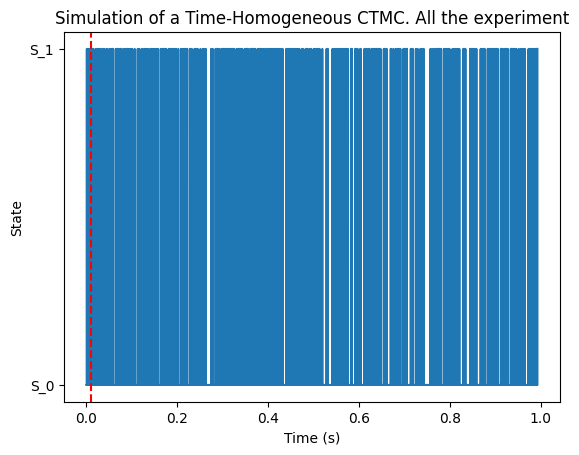

In [5]:

# Plot the result
s,e = 0,-1
plt.step(times[s:e], states[s:e], where='post')
plt.axvline(x=frame_duration, color='red', linestyle='--', label='Boundary between frames')

plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('Simulation of a Time-Homogeneous CTMC. All the experiment')
plt.yticks(range(Q.shape[0]), ['S_0', 'S_1'])
plt.show()


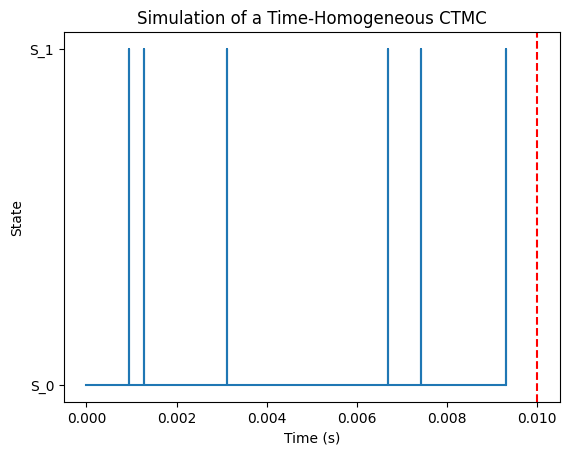

In [6]:
# Divide the simulation into frames
frames = divide_into_frames(times, states, frame_duration, num_frames)


# Plot the result
plt.step(frames[0][0], frames[0][1], where='post')
plt.axvline(x=frame_duration, color='red', linestyle='--', label='Boundary between frames')

plt.xlabel('Time (s)')
plt.ylabel('State')
plt.title('Simulation of a Time-Homogeneous CTMC')
plt.yticks(range(Q.shape[0]), ['S_0', 'S_1'])
plt.show()

# Photon Statistics

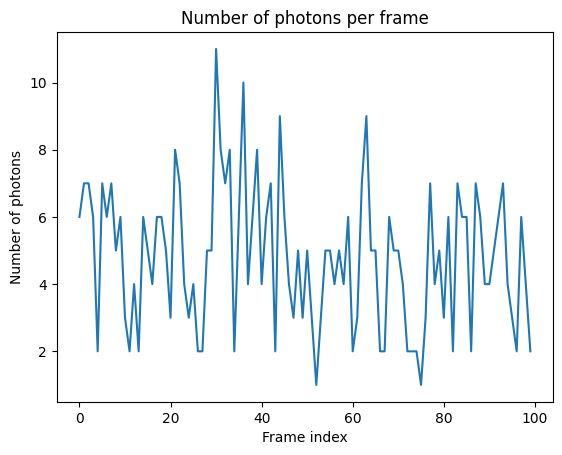

In [7]:
def count_photons_in_frames(frames, photon_emitting_state=1):
    photon_counts = np.zeros(len(frames), dtype=int)

    for i, (times, states) in enumerate(frames):
        # Count the number of times the photon-emitting state is visited in the frame
        photon_counts[i] = np.sum(states == photon_emitting_state)

    return photon_counts

# Count the number of photons in each frame
photon_counts = count_photons_in_frames(frames)

# photon_counts now contains the number of photons in each frame

plt.plot(photon_counts)
plt.xlabel('Frame index')
plt.ylabel('Number of photons')
plt.title('Number of photons per frame')
plt.show()

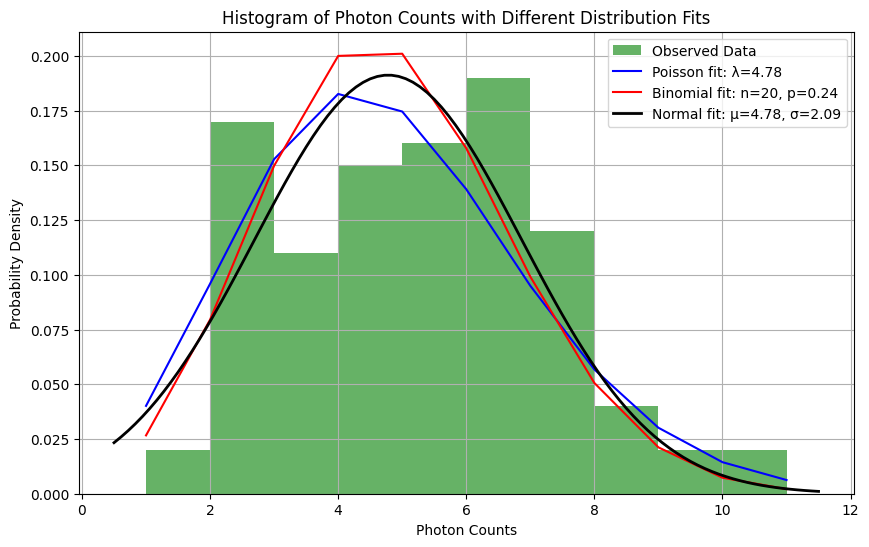

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm

#
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(photon_counts, bins=np.arange(photon_counts.min(), photon_counts.max() + 1), 
                                density=True, alpha=0.6, color='g', label='Observed Data')

# Fit and plot Poisson distribution
lambda_poisson = np.mean(photon_counts)
poisson_fit = poisson.pmf(np.arange(photon_counts.min(), photon_counts.max() + 1), lambda_poisson)
plt.plot(np.arange(photon_counts.min(), photon_counts.max() + 1), poisson_fit, 'b', ms=8, label=f'Poisson fit: λ={lambda_poisson:.2f}')

# Fit and plot Binomial distribution (approximation for small n, large p)
n_binom = 20  # An example n, needs adjustment based on data
p_binom = lambda_poisson / n_binom
binom_fit = binom.pmf(np.arange(photon_counts.min(), photon_counts.max() + 1), n_binom, p_binom)
plt.plot(np.arange(photon_counts.min(), photon_counts.max() + 1), binom_fit, 'r', ms=5, label=f'Binomial fit: n={n_binom}, p={p_binom:.2f}')

# Fit and plot Normal distribution
mu, std = norm.fit(photon_counts)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Normal fit: μ={mu:.2f}, σ={std:.2f}')

# Add labels and legend
plt.xlabel('Photon Counts')
plt.ylabel('Probability Density')
plt.title('Histogram of Photon Counts with Different Distribution Fits')
plt.legend()
plt.grid(True)
plt.show()


# create GIF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



In [6]:

frames_poisson = np.load("frames_poisson.npy")
img_dir='poisson output/'
us_factor = 8
# Define the region for the inset plot
x1, x2, y1, y2 = 1400//us_factor, 1600//us_factor, 1400//us_factor, 1600//us_factor


In [ ]:

# Create and save each frame as an image
for i in range(num_frames):
    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.imshow(frames_poisson[i],origin='lower', cmap="gray", vmin=0)
    ax.set_title(f'Frame {i} undersampled+poisson')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    fig.colorbar(cax, ax=ax)

    # Create an inset axes within the main plot, located at the bottom right
    ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=2)

    # Plot the zoomed-in region in the inset axes
    cax_inset = ax_inset.imshow(frames_poisson[i][y1:y2, x1:x2], cmap="gray", vmin=0, vmax=np.max(frames_poisson))
    ax_inset.set_title('Zoomed-In', color='white')  # Set title color to white
    ax_inset.set_xlabel('X', color='white')  # Set x-axis label color to white
    ax_inset.set_ylabel('Y', color='white')  # Set y-axis label color to white

    # Change the axis ticks and spine colors to white
    ax_inset.tick_params(axis='x', colors='white')
    ax_inset.tick_params(axis='y', colors='white')
    for spine in ax_inset.spines.values():
        spine.set_edgecolor('white')

    # Optionally, add rectangle to show the zoomed-in region
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', lw=2)
    ax.add_patch(rect)

    # Save the plot as an image
    img_path = os.path.join(img_dir, f'frame_{i}_poisson.png')
    plt.savefig(img_path)
    plt.show()
    plt.close()

# Create a GIF from the saved images
images = []
for i in range(num_frames):
    img_path = os.path.join(img_dir, f'frame_{i}_poisson.png')
    images.append(imageio.imread(img_path))

gif_path = '/content/drive/MyDrive/i3s/plots_palm/emitted_photons_poisson.gif'
imageio.mimsave(gif_path, images, duration=0.5)  # duration is in seconds per frame

print(f'GIF saved as {os.path.abspath(gif_path)}')


In [7]:

images = []
for i in range(1000):
    img_path = os.path.join(img_dir, f'frame_{i}_poisson.png')
    images.append(imageio.imread(img_path))

gif_path = 'emitted_photons_poisson.gif'
imageio.mimsave(gif_path, images, duration=0.5)  # duration is in seconds per frame

print(f'GIF saved as {os.path.abspath(gif_path)}')


/tmp/ipykernel_20583/1448194952.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(img_path))


GIF saved as /home/lenoco/Documents I3S/continuous time/emitted_photons_poisson.gif


In [11]:

frames_poisson = np.load("frames_sofi.npy")
img_dir='output/'
us_factor = 1
# Define the region for the inset plot
x1, x2, y1, y2 = 1400//us_factor, 1600//us_factor, 1400//us_factor, 1600//us_factor
for i in [1,18,30,638,678,974] :
    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.imshow(frames_poisson[i],origin='lower', cmap="gray", vmin=0)
    ax.set_title(f'Frame {i} undersampled+poisson')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    fig.colorbar(cax, ax=ax)

    # Create an inset axes within the main plot, located at the bottom right
    ax_inset = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=2)

    # Plot the zoomed-in region in the inset axes
    cax_inset = ax_inset.imshow(frames_poisson[i][y1:y2, x1:x2], cmap="gray", vmin=0, vmax=np.max(frames_poisson))
    ax_inset.set_title('Zoomed-In', color='white')  # Set title color to white
    ax_inset.set_xlabel('X', color='white')  # Set x-axis label color to white
    ax_inset.set_ylabel('Y', color='white')  # Set y-axis label color to white

    # Change the axis ticks and spine colors to white
    ax_inset.tick_params(axis='x', colors='white')
    ax_inset.tick_params(axis='y', colors='white')
    for spine in ax_inset.spines.values():
        spine.set_edgecolor('white')

    # Optionally, add rectangle to show the zoomed-in region
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', lw=2)
    ax.add_patch(rect)

    # Save the plot as an image
    img_path = os.path.join(img_dir, f'frame_{i}.png')
    plt.savefig(img_path)
    plt.show()
    plt.close()


MemoryError: Unable to allocate 31.2 GiB for an array with shape (4194304000,) and data type float64